In [6]:
import pandas as pd
import os
print(os.path.abspath('../'))
# set the path where you have downloaded the data files

file_path = os.path.abspath('../Assignment 1/')
print(file_path)

data_df = pd.read_csv(file_path+'/titanic1.csv')
ctest = pd.read_csv(file_path+'/titanic1.csv')

# For windows, if the above paths doesn't works
# import os
# f_path = os.path.join(*['C:', 'Users', 'user', 'Desktop', 'titanic1.csv'])
# train = pd.read_csv(f_path)
# or maybe try following to reach to the path
# absolute_path = os.path.abspath(os.path.dirname('titanic1.csv'))

C:\Users\Sheikh M Muneer\Documents
C:\Users\Sheikh M Muneer\Documents\Assignment 1


In [7]:
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data_df.shape

(891, 12)

In [9]:
data_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### 1) Change/Replace the values of Survived Column from 1 and 0 to 'Survived' and 'Not Survived'  
#### (Solved for you guys to get going through the exercise)

In [10]:
# Here we will use .replace which we discussed in class topic "Data Preprocessing"
data_df['Survived'].replace({0:'Not Survived'}, inplace=True)

In [11]:
data_df['Survived'].replace({1:'Survived'}, inplace=True)

In [15]:
data_df.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# Validate that the replace command's output is generated as intended 
data_df['Survived'].unique()

array(['Not Survived', 'Survived'], dtype=object)

## Univariate Analysis

#### 2) Calculate in percent how many of the total survived?

In [45]:
survival_percent = len(data_df.loc[data_df['Survived'] == 'Survived'].values)/data_df.shape[0]*100
print('Out of 100 {0} percent people survived'.format(round(survival_percent,2)))

Out of 100 38.38 percent people survived


#### 3) Plot a bar chart of the percentages of people 'Survived' and 'Not Survived'?

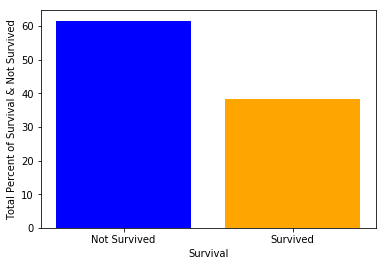

In [66]:
#Importing Matplotlib library
from matplotlib import pyplot as plt
# Line written below will enable the display mechanism of plots in this Notebook
%matplotlib inline

fig, ax = plt.subplots()  # ax is  empty plot
x = data_df['Survived'].unique()  
# Counting 'Males' and 'Females' in the dataset  
y = data_df['Survived'].value_counts()/data_df.shape[0]*100  
# Plotting the bar graph  
ax.bar(x, y,color= ['Blue','Orange'])  # make bar plot
ax.set_xlabel('Survival')  
ax.set_ylabel('Total Percent of Survival & Not Survived')  
plt.show() 

#### 4) Calculate in percent the distribution of male and female in the data?

In [62]:
data_gender = data_df['Sex'].value_counts()/data_df.shape[0]*100  
pd.DataFrame(data_gender)

,Sex
male,64.758698
female,35.241302


#### 5) Plot a bar chart of the percentages of Male and Female in the given data?

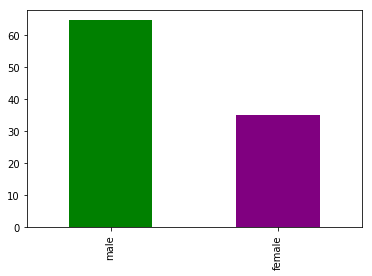

In [73]:
data_gender.plot(kind="bar",color=['Green','Purple'])   
plt.show()

### We can observe a column namely "Pclass" which denotes different travelling Class that we usually have trains and aeroplanes. Lets see how many unique classes we have in our data:

In [74]:
data_df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

### As shown above, there are three unique classes (standards) in which the passengers are travelling i.e 1st ,2nd and 3rd class. Please note that although these are denoted as numbers in the data, they are termed as Categorical Data since these are the travelling class categories 1st Class being the Highest and most expensive('Fare').
#### 6) On the basis of discussion in the class, can you answer which type of Categorical Data is this? 

In [83]:
# Write your answer as a comment
# This is Ordinal Categorical Data in which There is a Order like Economy Class, Business Class,Ordinary Class

This is Ordinal Categorical Data in which There is a Order like Economy Class, Business Class,Ordinary Class

#### 7) Calculate the distrinution of "number" of people travelling in different classes(Pclass) i.e how many people were travelling in 1st, 2nd and 3rd class? (HINT: You may use value_counts() for it)

In [80]:
data_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### 8) Plot a bar chart showing the distrinution of "number" of people travelling in different classes(Pclass) i.e plot of how many people were travelling in 1st, 2nd and 3rd class?

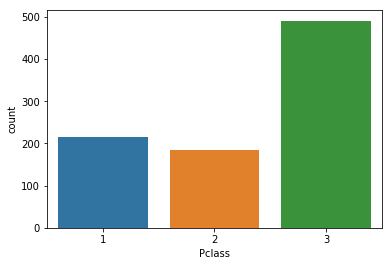

In [85]:
# ‘hue’ is used to visualize the effect of an additional variable to the current distribution.  
sns.countplot(data_df['Pclass'])  # hue is used for group 
plt.show()  # sns get calculation automatically